# twissed

* Author: D. Minenna
* Date: January 2024

Tutorial on using the twissed package.
In this notebook, we are presenting a number of functions for PIC simulations.

## Import
The import of the package is done by the command:
```python
import twissed
```

In [1]:
"""
Example of use of skypiea.
Author: D. Minenna
Date: January 2023
"""

# import
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.constants as const

# twissed
import twissed
# Select color maps
cm = twissed.Cmap()



 twissed (v2.1.1, 2023/01/25)



For fbpic simulations, we can check the presence of files in the defined directory

In [2]:
# from density import *

# Selection of the directory with data
directory = os.getcwd() + '/data/FBPIC/lab_diags'

# Find all timesteps
steps = twissed.Steps()
steps.find_data(directory=directory,source='fbpic',verbose=True)

c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5
timesteps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [3]:
for timestep in steps.timesteps:
    
    #Creation of the step class
    step = twissed.Step()

    # Read data 
    step = steps.read_beam(step,timestep,species='electrons')
    step = steps.read_field(step,timestep)
    
    if step.N > 10:
        xrange=[-3*step.sigma_x*1e6,3*step.sigma_x*1e6]
        yrange=[-3*step.sigma_y*1e6,3*step.sigma_y*1e6]
        zrange=[-3*step.sigma_z*1e6,3*step.sigma_z*1e6]
    else:
        xrange=[None,None]
        yrange=[None,None]
        zrange=[None,None]
    steps.get_step(step,xrange=xrange,xconv='um',yrange=yrange,yconv='um',zrange=zrange,zconv='um')
    
print(steps.keys())

Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000000.h5 for species: electrons
No beam!


Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000001.h5 for species: electrons
No beam!
Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000002.h5 for species: electrons
No beam!
Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000003.h5 for species: electrons
No beam!
Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000004.h5 for species: electrons
No beam!
Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000005.h5 for species: electrons
No beam!
Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000006.h5 for species: electrons
No beam!
Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000007.h5 for species: electrons
Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000008.h5 for species: electrons
Read file 

In [4]:
steps.plot1D('z_avg','charge',xconv='mm')

AttributeError: 'Steps' object has no attribute 'units'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyError: 'a0'

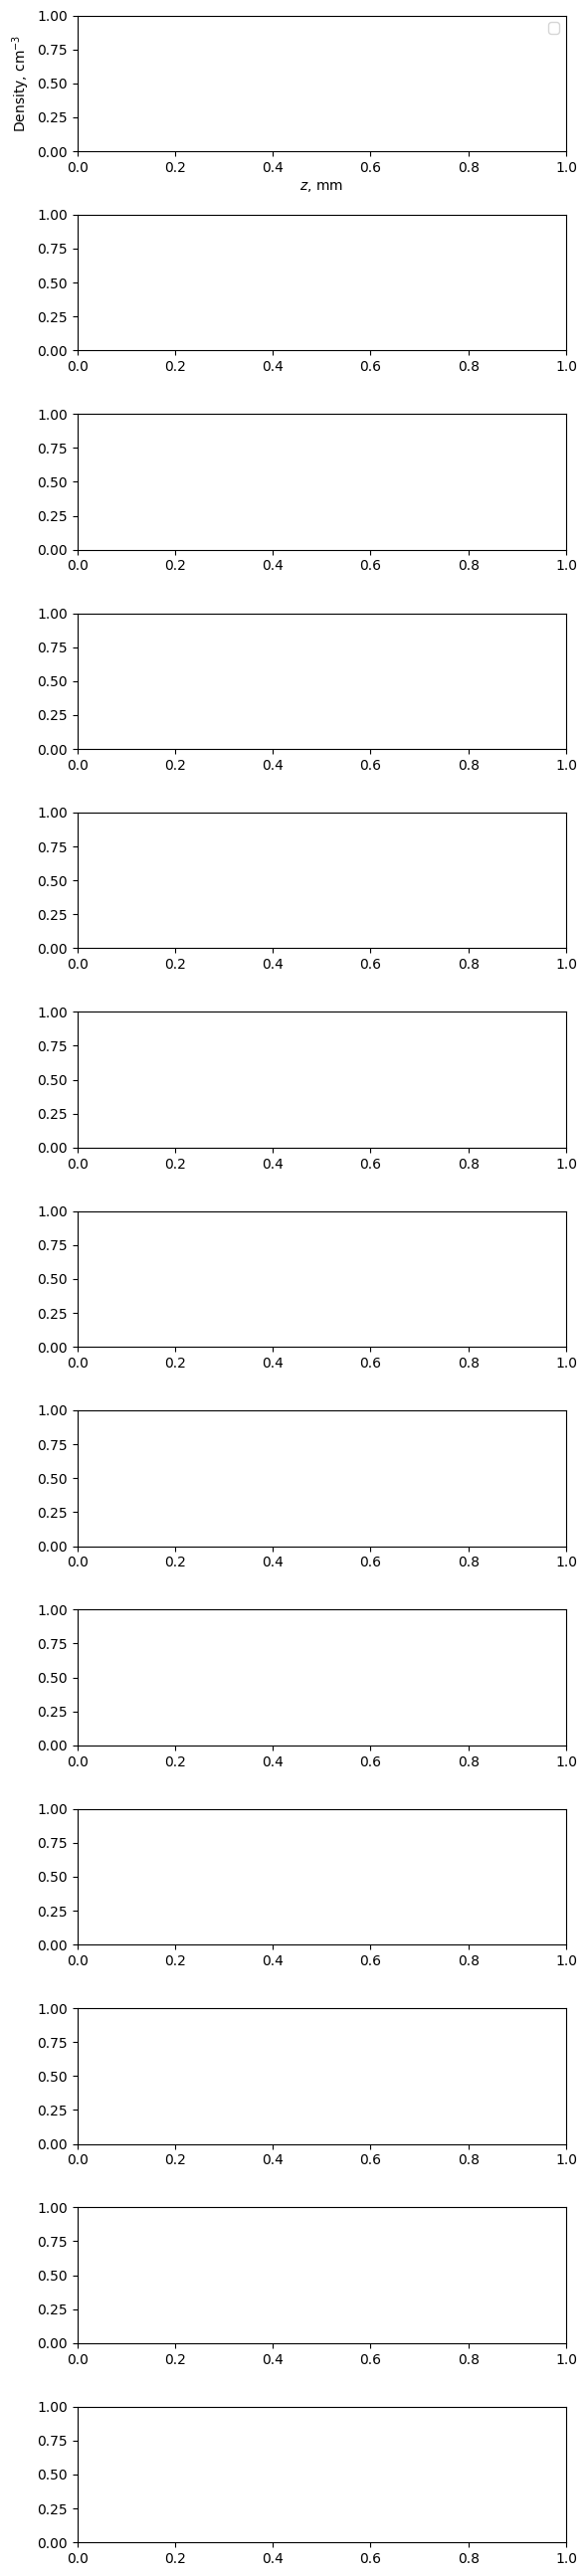

In [5]:
i=-1 
Ncase = 13   
fig, axs = plt.subplots(figsize=(6, Ncase*2), dpi=100, nrows=Ncase, ncols=1, tight_layout = True)

i+=1
ax = axs[i]
# ax.plot(zpos*1e3,1e-6*n_at*dens_func_e(zpos,0),'k',lw=5) 
# ax.plot(zpos*1e3,1e-6*n_at*(Prop_H_in_1 + Prop_N_in_1*Q_init_N)*dens_func_at1(zpos,0),'g-',lw=3)
# ax.fill(zpos*1e3,1e-6*n_at*(Prop_H_in_1 + Prop_N_in_1*Q_init_N)*dens_func_at1(zpos,0), hatch='///',facecolor='g',edgecolor='k',alpha=0.5)
# ax.plot(zpos*1e3,1e-6*n_at*dens_func_at2(zpos,0),'r-',lw=3)
# ax.fill(zpos*1e3,1e-6*n_at*dens_func_at2(zpos,0), hatch='\\',facecolor='r',edgecolor='k',alpha=0.5)
# ax.plot(zpos*1e3,1e-6*n_at*dens_func_e(zpos,0),'k',lw=5)

# ax.vlines(zfoc*1e3,0,1e-6*n_at,colors='red',label=r'$z$ focal')

ax.legend()
ax.set_xlabel(r'$z$, mm')
ax.set_ylabel(r'Density, cm$^{-3}$')
    
i+=1
ax = axs[i]
steps.plot1D('zfield_a0','a0',xconv='m',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('zfield_a0','a0_transverse_fwhm',xconv='m',ax=ax)
steps.plot1D('zfield_a0','a0_longitudinal_fwhm',xconv='m',ax=ax)
ax.set_ylim([np.min([steps.a0_longitudinal_fwhm,steps.a0_transverse_fwhm]),
             np.max([steps.a0_longitudinal_fwhm,steps.a0_transverse_fwhm])])

i+=1
ax = axs[i]
steps.plot1D('zfield_a0','waist0',xconv='m',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','charge',xconv='mm',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','Ek_avg',xconv='mm',ax=ax)
steps.plot1D('z_ave','Ek_med',xconv='mm',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','Ek_std',xconv='mm',ax=ax)
steps.plot1D('z_ave','Ek_mad',xconv='mm',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','Ek_std_perc',xconv='mm',ax=ax)
steps.plot1D('z_ave','Ek_mad_perc',xconv='mm',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','emit_norm_rms_x',xconv='mm',ax=ax)
steps.plot1D('z_ave','emit_norm_rms_y',xconv='mm',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','beta_x',xconv='mm',ax=ax)
steps.plot1D('z_ave','beta_y',xconv='mm',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','gamma_x',xconv='mm',ax=ax)
steps.plot1D('z_ave','gamma_y',xconv='mm',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','alpha_x',xconv='mm',ax=ax)
steps.plot1D('z_ave','alpha_y',xconv='mm',ax=ax)

i+=1
ax = axs[i]
steps.plot1D('z_ave','sigma_x',xconv='mm',ax=ax)
steps.plot1D('z_ave','sigma_y',xconv='mm',ax=ax)
steps.plot1D('z_ave','sigma_z',xconv='mm',ax=ax)

In [6]:
steps.plot2D('z','y',xconv='mm',yconv='um')

KeyError: 'y_charge_pos'

In [8]:
Ncase = 8

i = 0
fig, axs = plt.subplots(figsize=(Ncase*6, len(steps.timesteps)*6), dpi=100,nrows=len(steps.timesteps), ncols=Ncase)
for timestep in steps.timesteps:
    
    #Creation of the step class
    step = twissed.Step()

    # Read data 
    step = twissed.fbpic_particle(step,directory,timestep,species='electrons')
    step = twissed.fbpic_field(step,directory,timestep)

    if step.N > 2:
        
        # Fig 1
        ax = axs[i,0]
        _ = step.hist2D('x','xp',xconv='um',yconv='mrad',
                        xrange=[-5,5],
                        yrange=[-5,5],
                        plot='pcolormesh_improved',
                        cmap=cm.cubehelix_r,
                        bins=[100,100],
                        ax=ax,
                        emit=False)

        # textannotate = r'$\epsilon_{\mathrm{N,rms},x}$: ' + f"{step.emit_Nrms_x:.3f} mm.mrad\n" + \
        #             r'$\epsilon_{\mathrm{tr,rms},x}$: ' + f"{step.emit_trace_x:.3e} mm.mrad\n" + \
        #             r"$\sigma_{x'}$: " + f"{step.sigma_xp*1e3:.3f} mrad\n" + \
        #             r'$\gamma_x$: ' + '{0:.3e}'.format(step.gamma_x) + ' mrad/mm\n' + \
        #             r'$\beta_x$: ' + '{0:.3e}'.format(step.beta_x) + ' mm/mrad\n' + \
        #             r"$\alpha_x$: " + f"{step.alpha_x:.3f}"
        # _ = ax.annotate(textannotate, xy=(0.1, 0.7),  xycoords='axes fraction',color='black',)

        # Fig 2
        ax = axs[i,1]
        _ = step.hist2D('y','yp',xconv='um',yconv='mrad',
                        xrange=[-15,15],
                        yrange=[-20,20],
                        plot='pcolormesh_improved',
                        cmap=cm.cubehelix_r,
                        bins=[100,100],
                        ax=ax,
                        emit=False)

        # textannotate = r'$\epsilon_{\mathrm{N,rms},y}$: ' + f"{step.emit_Nrms_y:.3f} mm.mrad\n" + \
        #             r'$\epsilon_{\mathrm{tr,rms},y}$: ' + f"{step.emit_trace_y:.3e} mm.mrad\n" + \
        #             r"$\sigma_{y'}$: " + f"{step.sigma_yp*1e3:.3f} mrad\n" + \
        #             r'$\gamma_y$: ' + '{0:.3e}'.format(step.gamma_y) + ' mrad/mm\n' + \
        #             r'$\beta_y$: ' + '{0:.3e}'.format(step.beta_y) + ' mm/mrad\n' + \
        #             r"$\alpha_y$: " + f"{step.alpha_y:.3f}"
        # _ = ax.annotate(textannotate, xy=(0.1, 0.7),  xycoords='axes fraction',color='black',)

        # Fig 3
        ax = axs[i,2]
        _ = step.hist2D('z_mean','energy_part_mean',
                        xconv='um',
                        xrange=[-7,7],
                        yrange=[-50,50],
                        plot='pcolormesh_improved',
                        cmap=cm.CMRmap_r,
                        bins=[100,100],
                        ax=ax,
                        emit=False)

        # textannotate = f"$Q$: {step.charge:.3f} pC\n" + \
        #                 r"$E_{\mathrm{Mean}}$: " + f"{step.energy_mean:.3f} MeV\n" + \
        #                 r"$\sigma_{E,\mathrm{RMS}}$: " + f"{step.energy_std:.3f} MeV ({step.energy_std_perc:.3f}%)\n" +\
        #                 f"$\sigma_z$: {step.sigma_z*1e6:.3f} $\mu$m"
        # _ = ax.annotate(textannotate, xy=(0.1, 0.8),  xycoords='axes fraction',color='black')

        # Fig 4
        ax = axs[i,3]
        _ = step.hist2D('x','y',xconv='um',yconv='um',
                        xrange=[-5,5],
                        yrange=[-15,15],
                        plot='pcolormesh_improved',
                        cmap=cm.cubehelix_r,
                        bins=[100,100],
                        ax=ax,
                        emit=False)

        # textannotate = f"$\sigma_x$: {step.sigma_x*1e6:.3f} $\mu$m\n" + \
        #                 f"$\sigma_y$: {step.sigma_y*1e6:.3f} $\mu$m"
        # _ = ax.annotate(textannotate, xy=(0.1, 0.89),  xycoords='axes fraction',color='black',)
        
        
    
    ax = axs[i,4]
    
    xname = r'$z$, mm'
    yname = r'$r$, $\mu$m'

    xlim = [step.zfield[0] * 1e3, step.zfield[int(np.size(step.zfield)*0.7)] * 1e3]
    ylim = [-50,50]

    vmin = 0.
    vmax = 1e25

    twissed.plot_density(ax,step.zfield*1e3,step.rfield*1e6,step.ne,xname,yname,xlim=xlim,ylim=ylim,vmin=vmin, vmax=vmax,cmap='gist_earth',cbarb='w')
    
    Ey2d_env_mask = np.abs(np.ma.masked_array(step.Ey2d_env, np.abs(step.Ey2d_env) < np.abs(step.Ey2d_env).max() * 0.5))
    ax.grid(False)
    g = ax.pcolormesh(step.zfield * 1e3,step.rfield * 1e6,Ey2d_env_mask,cmap='hot')
    # plt.colorbar(g, ax=ax)
    
    
    xname = r'$z$, mm'
    yname = r'$E_z$, GeV'
    ax2 = ax.twinx()
    ax2.plot(step.zfield*1e3,step.Ez*1e-9)
    ax.set_xlim(step.zfield[0] * 1e3, step.zfield[int(np.size(step.zfield)*0.7)] * 1e3)
    ax.set_ylim(-50,50)
    ax2.set_ylim(-80,80)
    # ax.set_xlabel(xname)
    ax2.set_ylabel(yname)
    ax2.grid(False)
    
    
      
    ax = axs[i,5]
    
    xname = r'$z$, mm'
    yname = r'$r$, $\mu$m'
    
    ax.grid(False)
    g = ax.pcolormesh(step.zfield*1e3,step.rfield*1e6,step.Er2d,cmap='Blues')
    plt.colorbar(g, ax=ax)
    
    
    ax.set_xlim(step.zfield[0] * 1e3, step.zfield[int(np.size(step.zfield)*0.7)] * 1e3)
    ax.set_ylim(-50,50)
        
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    
    
        
    ax = axs[i,6]
    
    xname = r'$z$, mm'
    yname = r'$a_0$'
    ax.plot(step.zfield* 1e3,step.a)
    ax.set_ylim(0,3.0)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    
    
    ax = axs[i,7]
    
    # ax.plot(zpos*1e3,1e-6*n_at*dens_func_e(zpos,0),'k',lw=5) 
    # ax.plot(zpos*1e3,1e-6*n_at*(Prop_H_in_1 + Prop_N_in_1*Q_init_N)*dens_func_at1(zpos,0),'g-',lw=3)
    # ax.fill(zpos*1e3,1e-6*n_at*(Prop_H_in_1 + Prop_N_in_1*Q_init_N)*dens_func_at1(zpos,0), hatch='///',facecolor='g',edgecolor='k',alpha=0.5)
    # ax.plot(zpos*1e3,1e-6*n_at*dens_func_H(zpos,0),'r-',lw=3)
    # ax.fill(zpos*1e3,1e-6*n_at*dens_func_H(zpos,0), hatch='\\',facecolor='r',edgecolor='k',alpha=0.5)
    # ax.plot(zpos*1e3,1e-6*n_at*dens_func_e(zpos,0),'k',lw=5)
    
    # ax.vlines(step.zfield_a0*1e3,0,1e-6*n_at,label=r'$a_0$')
    # ax.vlines(step.zfieldMin *1e3,0,1e-6*n_at,label=r'$z$ min')
    # ax.vlines(step.zfieldMax *1e3,0,1e-6*n_at,label=r'$z$ max')
    # ax.vlines(zfoc*1e3,0,1e-6*n_at,colors='red',label=r'$z$ focal')

    ax.legend()
    ax.set_xlabel(r'$z$, mm')
    ax.set_ylabel(r'Density, cm$^{-3}$')
    ax.set_title('id:' + str(i) + ' time: '+str(step.time))

    i = i + 1
    
# set the spacing between subplots
# plt.subplots_adjust(hspace=0.)
# plt.subplot_tool()
# plt.subplots_adjust(left=0.,
#                     bottom=0.1, 
#                     right=0.1, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.4)

# ax.set_xlabel(xname)
# ax.set_ylabel(yname)

Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000000.h5 for species: electrons
No beam!
Read file c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5/data00000000.h5


AttributeError: module 'twissed' has no attribute 'plot_density'